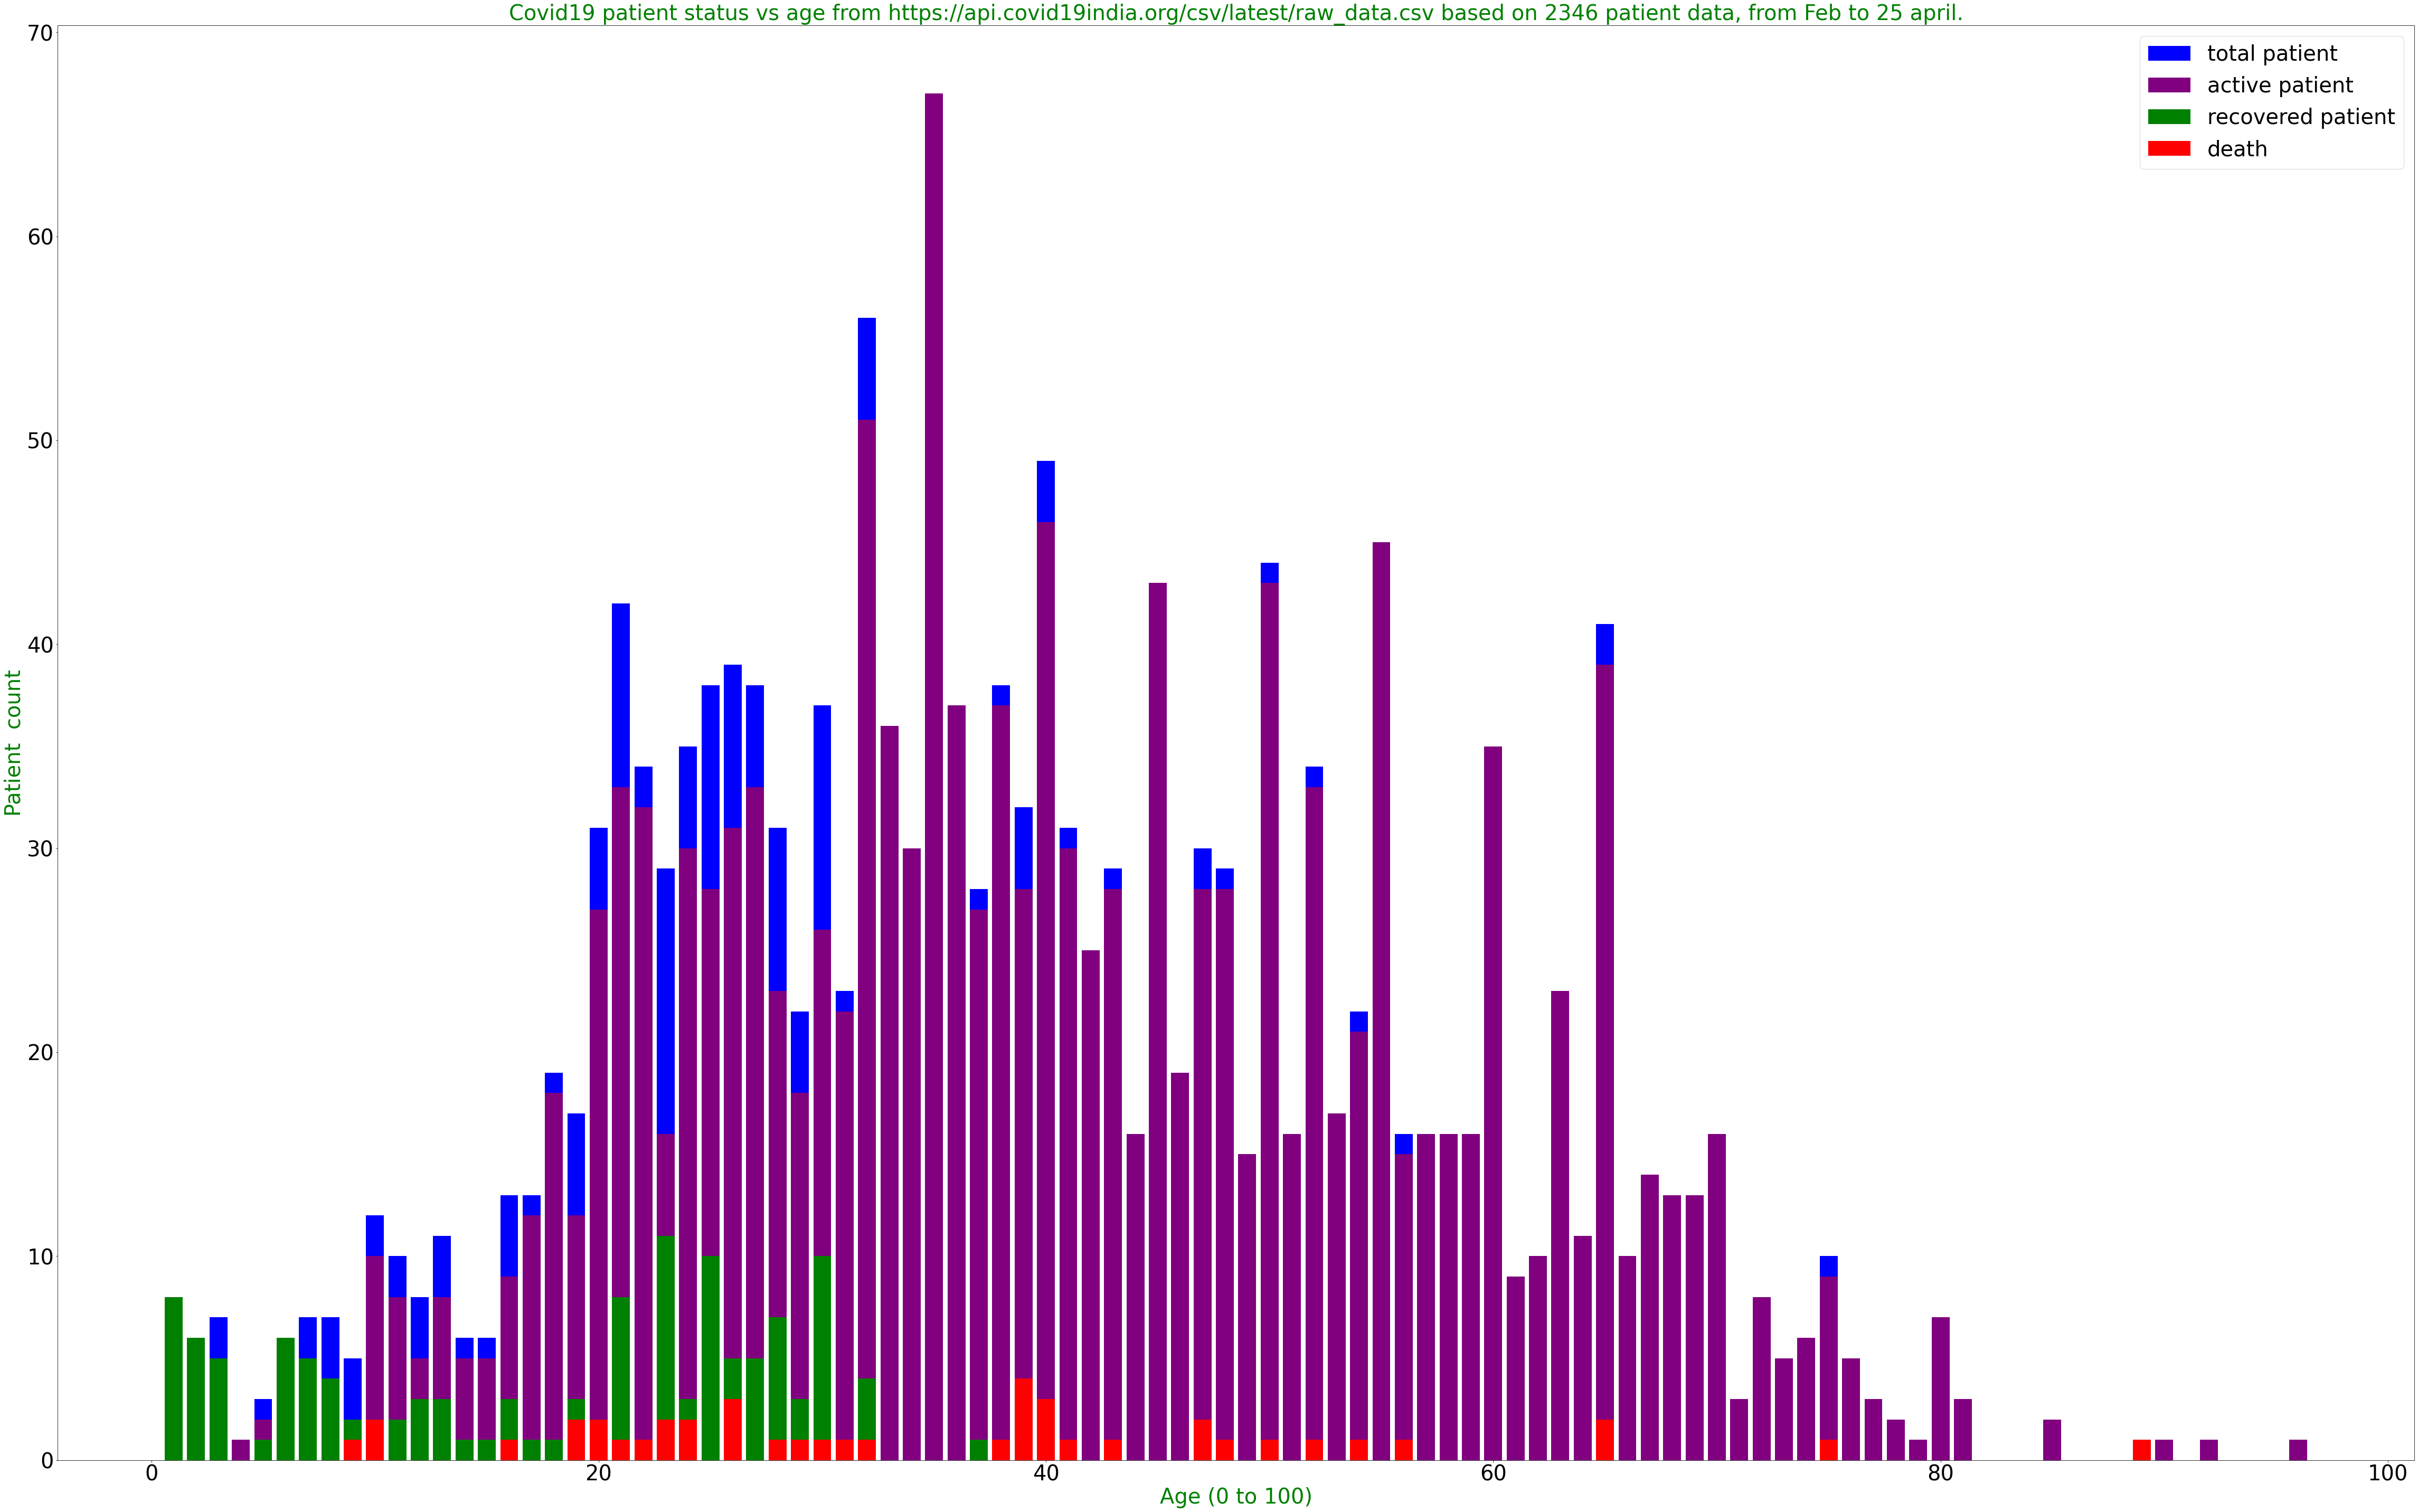

In [29]:
# indian graph to show age rate

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math

df = pd.read_csv('raw_data1.csv')
status_idx =  ['Deceased' 'Hospitalized' 'Migrated' 'Recovered']
modified_df = df.loc[:, ['Age Bracket','Current Status']].dropna()

age_list = list(modified_df['Age Bracket'])
# data cleaning
for i, v in enumerate(age_list):
  if len(v.split('-'))==2:
    v = (float(v.split('-')[0]) + float(v.split('-')[1]))/2 # hard coded mean calculation
  age_list[i] = math.ceil(float(v))
age_list = sorted(age_list)


status_list = list(modified_df['Current Status'])

data = {}
for i, age in enumerate(age_list):
  if age not in data.keys():
    data[age]=[status_list[i]]
  else:  
    lst = data[age]
    lst.append(status_list[i])
    data[age] = lst


# age_recov = list()
# age_death = list()
# age_hospital = list()
# age_migrated = list()

# for k in data.keys():
#   age_recov.append([k, data[k].count('Recovered')])
#   age_death.append([k, data[k].count('Deceased')])
#   age_hospital.append([k, data[k].count('Hospitalized')])
#   age_migrated.append([k, data[k].count('Migrated')])


age_list = list()
death_list = list()
active_list = list()
recovered_list= list()
total_patient = list()

for k in data.keys():
  age_list.append(k)

for age in age_list:
  death_list.append(data[age].count('Deceased'))
  active_list.append(data[age].count('Hospitalized'))
  recovered_list.append(data[age].count('Recovered'))
  total_patient.append(data[age].count('Deceased') + data[age].count('Hospitalized') + data[age].count('Recovered'))


plt.figure(figsize=(80, 50))
# plt.bar(x_data, y_data)
plt.bar(age_list, total_patient, color='blue', linewidth=8)
plt.bar(age_list, active_list, color='purple', linewidth=8)
plt.bar(age_list, recovered_list, color='green', linewidth=8)
plt.bar(age_list, death_list, color='red', linewidth=8)


plt.legend(['total patient', 'active patient', 'recovered patient', 'death'], prop={'size':40}) #labels with style
plt.xticks(size=40, color='black')
plt.yticks(size=40, color='black')
plt.xlabel('Age (0 to 100)', size=40, color='green')
plt.ylabel('Patient  count', size=40, color='green')
plt.title('Covid19 patient status vs age', size=40, color='green')
plt.show()